# Description

This Notebook is trying to train a dataset of the middle tier of hoursing price in US metro breakdown with Random Forest Regression. We have the location info as States, and the July price of 2021 and 2020. We want to predict the housing price of July 2022

In [2]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from rfpimp import *
from sklearn.ensemble import RandomForestRegressor
import statistics

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Functions we can use later

#from sklearn.metrics import accuracy_score
#import tensorflow as tf
#from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [3]:
topdata_df = pd.read_csv("../Data/Metro_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_month.csv")
topdata_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,102001,0,United States,Country,NaN,244333.0,245121.0,245962.0,247682.0,249428.0,...,615835.0,622977.0,631032.0,640061.0,650157.0,660847.0,672048.0,681914.0,689030.0,692264.0
1,394913,1,"New York, NY",Msa,NY,398865.0,401238.0,403375.0,407598.0,411543.0,...,939491.0,944978.0,949990.0,956174.0,963760.0,974320.0,985792.0,997976.0,1008006.0,1015480.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,413670.0,415189.0,417320.0,421391.0,425659.0,...,1450057.0,1462649.0,1478805.0,1497880.0,1519784.0,1551021.0,1585577.0,1616146.0,1620869.0,1619233.0
3,394463,3,"Chicago, IL",Msa,IL,296585.0,297344.0,298311.0,300193.0,302149.0,...,463015.0,467138.0,471178.0,474941.0,478551.0,483620.0,489285.0,495846.0,500800.0,503969.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,233065.0,233141.0,233236.0,233487.0,233765.0,...,541837.0,551069.0,561026.0,573514.0,587264.0,600121.0,615856.0,630577.0,643434.0,646605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,164347.0,164846.0,167615.0,170476.0,174470.0,176216.0,178175.0,179841.0,182746.0,185529.0
904,753874,930,"Craig, CO",Msa,CO,158945.0,159371.0,159828.0,160232.0,160585.0,...,350923.0,353142.0,358159.0,362539.0,366067.0,366596.0,366985.0,368302.0,373880.0,380083.0
905,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,218455.0,218939.0,222082.0,225750.0,229603.0,232335.0,235374.0,237065.0,239063.0,240457.0
906,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,154216.0,154747.0,158312.0,161950.0,166412.0,167673.0,168942.0,169545.0,171939.0,174749.0


In [4]:
topdata_df.nunique()

RegionID      908
SizeRank      904
RegionName    908
RegionType      2
StateName      51
             ... 
2022-03-31    905
2022-04-30    906
2022-05-31    905
2022-06-30    907
2022-07-31    906
Length: 276, dtype: int64

In [36]:
julyTop_df=topdata_df[['RegionID', 'RegionName','StateName', '2018-07-31','2019-07-31','2020-07-31','2021-07-31','2022-07-31']]
julyTop_df.nunique()

RegionID      908
RegionName    908
StateName      51
2018-07-31    890
2019-07-31    900
2020-07-31    897
2021-07-31    901
2022-07-31    906
dtype: int64

In [38]:
julyTop_df.head()

,StateName,2018-07-31,2019-07-31,2020-07-31,2021-07-31,2022-07-31
1,NY,809128.0,818616.0,820271.0,911762.0,1015480.0
2,CA,1136406.0,1136709.0,1181638.0,1398077.0,1619233.0
3,IL,397285.0,400216.0,400955.0,447852.0,503969.0
4,TX,403827.0,414456.0,425741.0,507081.0,646605.0
5,PA,400559.0,411498.0,424956.0,493563.0,553699.0


In [39]:
julyTop2022 = julyTop_df['2022-07-31']
avg_price=julyTop2022.mean()
print(f'Average housing price in the United States is ${avg_price}')

Average housing price in the United States is $446168.1334841629


In [40]:
bystateTop=julyTop_df.groupby(['StateName']).mean()
bystateTop=bystateTop.reset_index()
bystateTop.head()

,StateName,2018-07-31,2019-07-31,2020-07-31,2021-07-31,2022-07-31
0,AK,427306.500000,442001.500000,425441.000000,449987.750000,4.873982e+05
1,AL,219068.850000,226588.400000,236531.450000,265819.700000,3.081182e+05
2,AR,182208.850000,189720.400000,195172.300000,218200.900000,2.541614e+05
3,AZ,344674.181818,363370.818182,384842.636364,483514.272727,5.972992e+05
4,CA,716267.212121,716022.212121,731307.818182,874520.121212,1.007446e+06


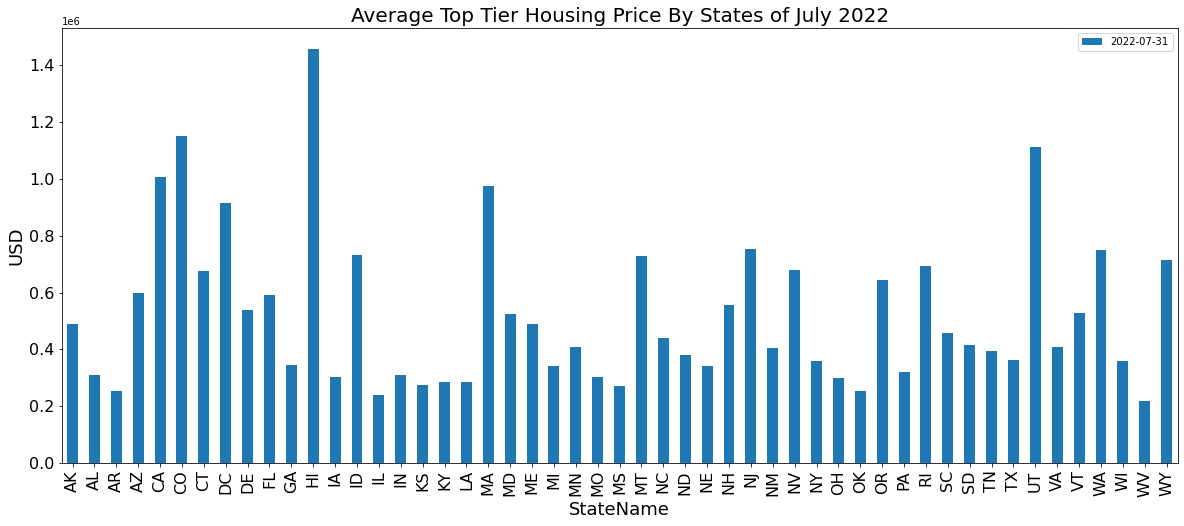

In [41]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# bystate.plot(kind="bar", color="red")
bystateTop.plot.bar('StateName','2022-07-31', style='-o')
plt.xlabel('StateName', size=18)
plt.ylabel('USD', size=18)
plt.xticks(rotation=90,size=16)
plt.yticks(size=16)
plt.title("Average Top Tier Housing Price By States of July 2022", size=20)
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

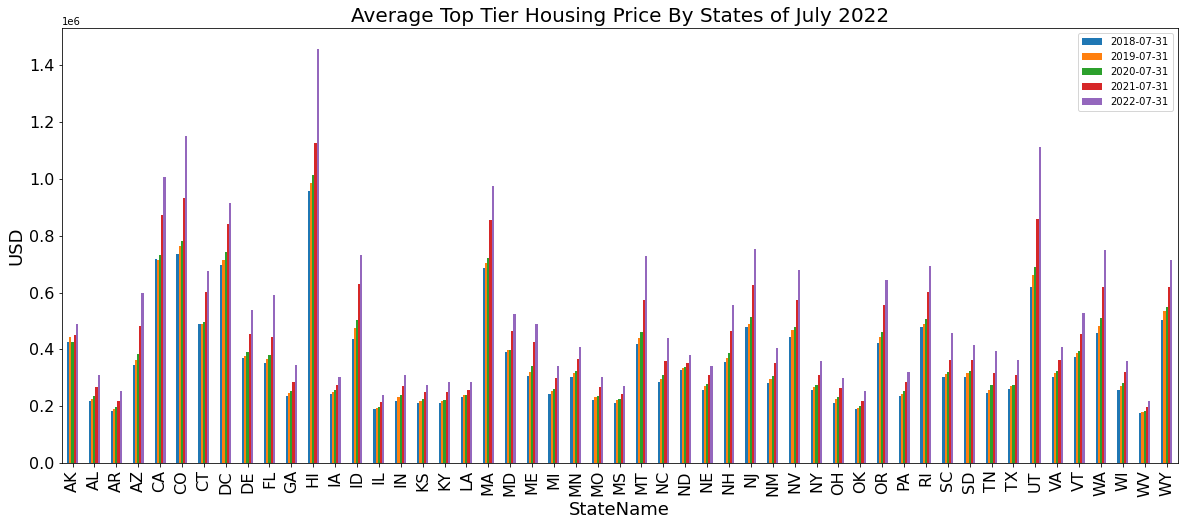

In [42]:
bystateTop.plot.bar('StateName', style='-o')
plt.xlabel('StateName', size=18)
plt.ylabel('USD', size=18)
plt.xticks(rotation=90,size=16)
plt.yticks(size=16)
plt.title("Average Top Tier Housing Price By States of July 2022", size=20)
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

In [10]:
# july_copy=july_df.copy()
# numbers=[*range(1,52,1)]
# numbers=pd.DataFrame(numbers, columns=["StateNo"])
# numbers


In [11]:
# july_copy["StateName"].tolist()

In [12]:
# states=july_copy["StateName"].unique().tolist()
# states

In [13]:
# dict={states[i]: numbers[i] for i in range(len(states))}
# dict

In [14]:
# for state in july_copy["StateName"].tolist()
#         if state in states
#         state=dict[state]

In [16]:
X, y = julyTop_df[['2020-07-31','2021-07-31']], julyTop_df['2022-07-31']
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100) # use 10 trees
rf.fit(X, y)

RandomForestRegressor()

In [18]:
unknown_x = [330000, 350000]
predicted_y = rf.predict([unknown_x])
print(predicted_y)

[383832.98]


/Users/bibowang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [19]:
from sklearn.metrics import mean_absolute_error

predictions = rf.predict(X)
e = mean_absolute_error(y, predictions)
ep = e*100.0/y.mean()
print(f"${e:.0f} average error; {ep:.2f}% error")

$8613 average error; 1.93% error



## Checking model generality

In [44]:
from sklearn.model_selection import train_test_split

X, y = julyTop_df[['2020-07-31','2021-07-31']], julyTop_df['2022-07-31']
# 20% of data goes into test set, 80% into training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")



$23427 average error; 5.25% error


In [45]:
rf = RandomForestRegressor(n_estimators=10,
                           n_jobs=-1,
                           oob_score=True)   # get error estimate
rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

OOB score 0.9579


/Users/bibowang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


In [46]:
rf = RandomForestRegressor(n_estimators=10,
                           n_jobs=-1,
                           oob_score=True)   # get error estimate
rf.fit(X_test, y_test)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

OOB score 0.9456


/Users/bibowang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


## Improve the accuracy

In [47]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$23369 average error; 5.24% error


In [30]:
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           oob_score=True)   # get error estimate
rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

OOB score 0.9731


# Add more July Features

In [43]:
# More July data added

X, y = julyTop_df[['2018-07-31','2019-07-31','2020-07-31','2021-07-31']], julyTop_df['2022-07-31']

# 20% of data goes into test set, 80% into training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$28396 average error; 6.36% error


In [48]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$23504 average error; 5.27% error


# Add location

In [49]:
julyTop_df

,StateName,2018-07-31,2019-07-31,2020-07-31,2021-07-31,2022-07-31
1,NY,809128.0,818616.0,820271.0,911762.0,1015480.0
2,CA,1136406.0,1136709.0,1181638.0,1398077.0,1619233.0
3,IL,397285.0,400216.0,400955.0,447852.0,503969.0
4,TX,403827.0,414456.0,425741.0,507081.0,646605.0
5,PA,400559.0,411498.0,424956.0,493563.0,553699.0
...,...,...,...,...,...,...
902,SD,255456.0,270191.0,276644.0,314307.0,354374.0
903,TX,129944.0,138049.0,143251.0,158719.0,185529.0
904,CO,301792.0,299092.0,296644.0,337873.0,380083.0
906,TX,135291.0,137702.0,137755.0,151006.0,174749.0


In [51]:
dummy_df=pd.get_dummies(julyTop_df)
dummy_df

,2018-07-31,2019-07-31,2020-07-31,2021-07-31,2022-07-31,StateName_AK,StateName_AL,StateName_AR,StateName_AZ,StateName_CA,...,StateName_SD,StateName_TN,StateName_TX,StateName_UT,StateName_VA,StateName_VT,StateName_WA,StateName_WI,StateName_WV,StateName_WY
1,809128.0,818616.0,820271.0,911762.0,1015480.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1136406.0,1136709.0,1181638.0,1398077.0,1619233.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,397285.0,400216.0,400955.0,447852.0,503969.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,403827.0,414456.0,425741.0,507081.0,646605.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,400559.0,411498.0,424956.0,493563.0,553699.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,255456.0,270191.0,276644.0,314307.0,354374.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
903,129944.0,138049.0,143251.0,158719.0,185529.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
904,301792.0,299092.0,296644.0,337873.0,380083.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
906,135291.0,137702.0,137755.0,151006.0,174749.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [53]:
y = dummy_df['2022-07-31']
X = dummy_df.drop(columns=['2022-07-31'])
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100) # use 10 trees
rf.fit(X, y)

RandomForestRegressor()

In [55]:
predictions = rf.predict(X)
e = mean_absolute_error(y, predictions)
ep = e*100.0/y.mean()
print(f"${e:.0f} average error; {ep:.2f}% error")

$7864 average error; 1.76% error


In [56]:
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           oob_score=True)   # get error estimate
rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

OOB score 0.9717


In [58]:
y = dummy_df['2022-07-31']
X = dummy_df.drop(columns=['2022-07-31'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


In [59]:
rf = RandomForestRegressor(n_estimators=10, random_state=78)
rf_model=rf.fit(X_train, y_train)


# Evaluate the model
y_pred = rf_model.predict(X_test)

#print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$26914 average error; 6.03% error


In [60]:
rf = RandomForestRegressor(n_estimators=100, random_state=78)
rf_model=rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$29053 average error; 6.51% error


In [69]:
# Less Features

y = dummy_df['2022-07-31']
X = dummy_df.drop(columns=['2022-07-31', '2018-07-31', '2019-07-31'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

rf = RandomForestRegressor(n_estimators=10, random_state=78)
rf_model=rf.fit(X_train, y_train)


# Evaluate the model
y_pred = rf_model.predict(X_test)

#print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$22060 average error; 4.94% error


In [70]:
rf = RandomForestRegressor(n_estimators=100, random_state=78)
rf_model=rf.fit(X_train, y_train)


# Evaluate the model
y_pred = rf_model.predict(X_test)


validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$21536 average error; 4.83% error


## Importance

In [62]:
from rfpimp import *
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
I = importances(rf, X_test, y_test)
I

,Importance
Feature,
2021-07-31,8.012367e-01
2019-07-31,7.495635e-02
2020-07-31,1.565263e-02
2018-07-31,1.118312e-03
StateName_CA,4.224179e-04
StateName_CO,2.015837e-04
StateName_WA,1.219303e-04
StateName_TN,7.521667e-05
StateName_GA,5.963941e-05


In [ ]:
states=july_df.StateName.value_counts()
states

In [65]:
julyTop_df['2022-07-31']=julyTop_df['2022-07-31'].astype(float)
yoy_df=julyTop_df[['2021-07-31','2021-07-31','2022-07-31']]
yoy_df.dtypes

2021-07-31    float64
2021-07-31    float64
2022-07-31    float64
dtype: object

In [66]:
yoy_df.head()

,2021-07-31,2021-07-31,2022-07-31
1,911762.0,911762.0,1015480.0
2,1398077.0,1398077.0,1619233.0
3,447852.0,447852.0,503969.0
4,507081.0,507081.0,646605.0
5,493563.0,493563.0,553699.0


In [67]:
yoy_df.var(axis=1)

1      3.585808e+09
2      1.630333e+10
3      1.049706e+09
4      6.488982e+09
5      1.205446e+09
           ...     
902    5.351215e+08
903    2.395920e+08
904    5.938947e+08
906    1.879100e+08
907    7.266209e+08
Length: 884, dtype: float64